# **Agglomerative Clustering**
Agglomerative clustering is a bottom-up, hierarchical machine learning algorithm where each data point starts as its own cluster. It merges the closest pairs of clusters iteratively based on similarity metrics (e.g., Euclidean distance) and linkage criteria (e.g., Ward’s) until all points form a single cluster or a defined stopping point is reached. 

![](https://media.geeksforgeeks.org/wp-content/uploads/20251117144305409428/agglomerative_clustering.webp)

## Working

- #### **Step 1**: Make individual clusters
    Initially, treat every data point as its own separate cluster. If there are N data points, you start with N clusters. Each point stands alone, with no grouping applied yet.

- #### **Step 2**: Combine two or more clusters having shortest eucledian distance
    Calculate the distance between all clusters (usually Euclidean). Merge the two clusters that are closest to each other. This merging is based on a linkage method like single, complete, or average linkage.

- #### **Step 3**: Repeat the process untill everything becomes as one cluster
    After merging, recompute distances between the new clusters. Keep combining the closest clusters step by step. Continue this iterative merging process until all points form one large cluster.
    
- #### **Step 4**: Set a threshold value
    Instead of merging until only one cluster remains, stop when the distance between clusters exceeds a chosen threshold. This threshold determines how many final clusters you obtain from the hierarchical structure.

## Implementation

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [18]:
# load the data set
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
# scale and apply PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
pca = PCA(n_components=2)

X_scaled = scaler.fit_transform(df)
pca_data = pca.fit_transform(X_scaled)
pca_data

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

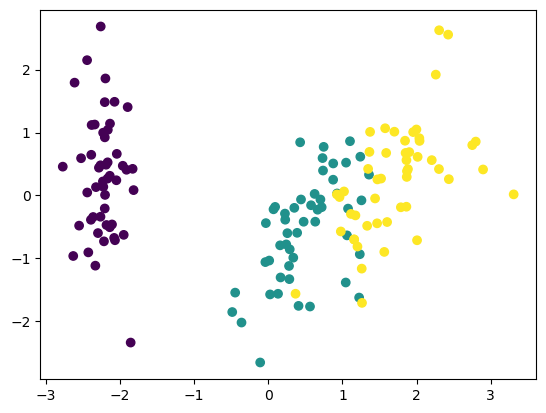

In [20]:
# plot the data
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data.target)

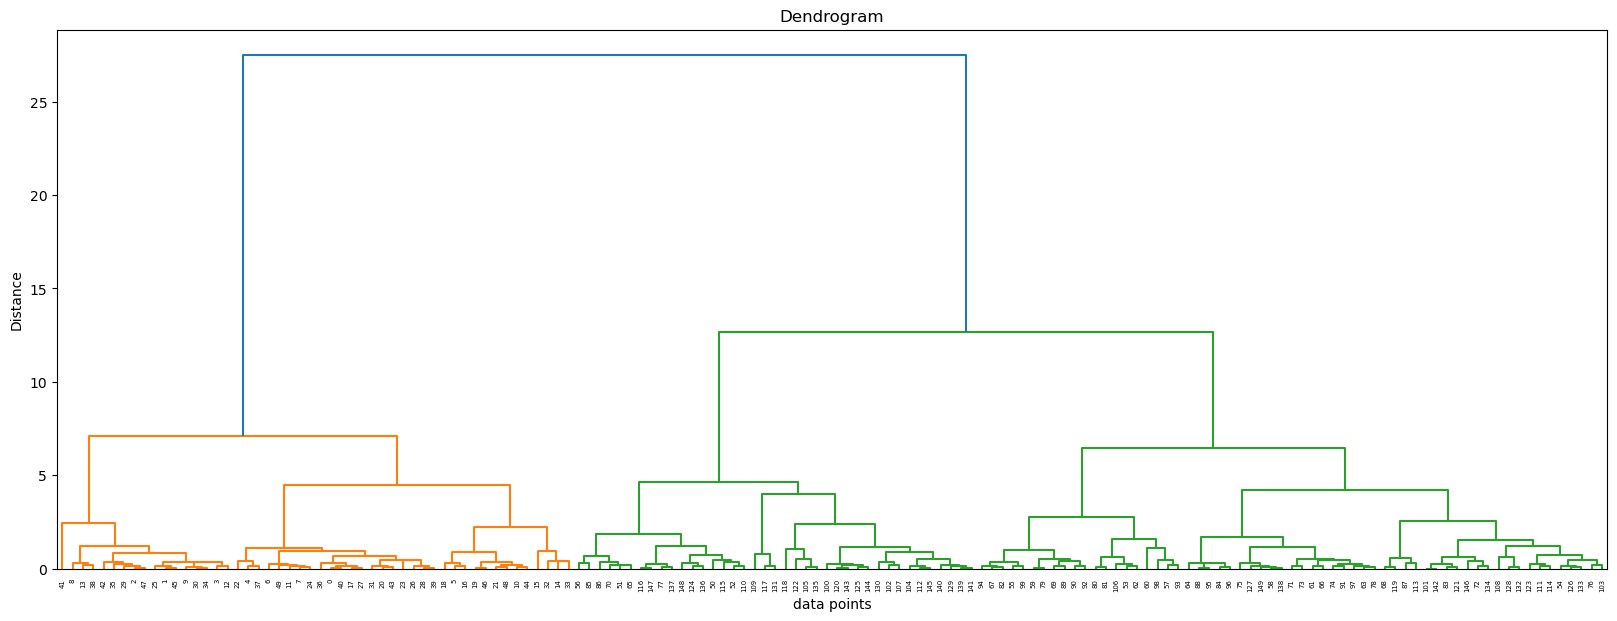

In [21]:
# make dendrogram

import scipy.cluster.hierarchy as sc

plt.figure(figsize=(20, 7))
sc.dendrogram(sc.linkage(pca_data, method="ward"))
plt.title("Dendrogram")
plt.xlabel("data points")
plt.ylabel("Distance")
plt.show()

In [22]:
# taking threshold as 15, we will have 2 clusters
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=2, linkage='ward')
agg.fit(pca_data)

AgglomerativeClustering()

In [23]:
agg.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

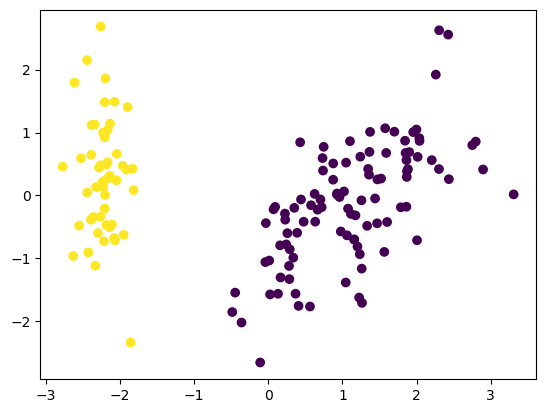

In [24]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=agg.labels_)